<a href="https://colab.research.google.com/github/mrsferret/Code-Division/blob/main/Projects/Sea_Level_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using numpy to look for a correlation between time data and sea level rise
---

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

For this exercise:
*  import the pandas library
*  import the numpy library
*  read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe (df)
*  use df.head() and df.info() to inspect the data and the column data types



In [15]:
import pandas as pd
import numpy as np

def calc_sea_level_stats(df):

  year_array, level_array = convert_to_numpy_array(df)
  #============================================================================
  # Create 2 numpy arrays from input df - one of Years and other of Sea Levels
  #============================================================================
  #year_array = df['Year'].to_numpy(np.int16)
  #display("\nYear Array: ", year_array)

  #level_array = df['CSIRO_Adj_Sea_Level'].to_numpy()
  #display("\nLevel Array: ", level_array)

  #============================================================================
  # calculate the mean Sea Level change
  #============================================================================
  level_mean = np.mean(level_array)
  print("\nmean of level_array, axis = None : ", np.mean(level_array)) 

  #============================================================================
  # calculate the standard deviation of the variation in Sea Levels
  #============================================================================
  level_std = np.std(level_array)
  print("\nstd of level_array, axis = None : ", np.std(level_array))
  
  #============================================================================
  # retrieve and save the max sea level rise
  #============================================================================
  max_rise = np.max(level_array)
  print("\nmax_rise: ", max_rise)

  #============================================================================
  # retrieve and save the min sea level rise
  #============================================================================
  min_rise = np.min(level_array)
  print("\nmin_rise: ", min_rise)

  #============================================================================
  # find the index of element in level array with value = max_rise 
  # and use this to find corresponding year in Year array
  #============================================================================
  # find the index to the element with max sea level rise
  arr_index = np.argmax(level_array)
  print("\narr_index: ", arr_index)

  max_rise_year = year_array[arr_index]
  print("\nmax_rise_year: ", max_rise_year)

  # retrieve and save the max sea level rise
  max_rise = np.max(level_array)
  print("\nmax_rise: ", max_rise)

  #============================================================================
  # find the index of element in level array with value = min_rise 
  # and use this to find corresponding year in Year array
  #============================================================================
  # find the index to the element with max sea level rise

  arr_index = np.argmin(level_array)
  print("\nmin arr_index: ", arr_index)

  min_rise_year = year_array[arr_index]
  print("\nmin_rise_year: ", min_rise_year)
  #===========================================================================
  # Calculate the Pearson product-moment correlation coefficient 
  #===========================================================================
  pearson_corr_ceof = np.corrcoef(year_array, level_array)
  print("\npearson_corr_ceof: ", pearson_corr_ceof)


def convert_to_numpy_array(df):
  #============================================================================
  # Create 2 numpy arrays from input df - one of Years and other of Sea Levels
  #============================================================================
  year_array = df['Year'].to_numpy(np.int16)
  #display("\nYear Array: ", year_array)

  level_array = df['CSIRO_Adj_Sea_Level'].to_numpy()
  #display("\nLevel Array: ", level_array)

  return year_array, level_array

#===============================================================================
# Start Here
#===============================================================================
# read csv file into a dataframe
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'
df = pd.read_csv(url)

# Change the column names
df.columns =['Year', 'CSIRO_Adj_Sea_Level', 'Lower_Err_Bound', 'Upper_Err_Bound', 'NOAA_Adj_Sea_Level']

# get some info about the dataframe
print (df.info())
print (df.head())
print (df.describe())

# get expected values to check against
max_df = (df[df.CSIRO_Adj_Sea_Level == df.CSIRO_Adj_Sea_Level.max()])
expctd_max_sea_rise = max_df.CSIRO_Adj_Sea_Level
expctd_max_sea_rise_yr = max_df.Year

print ("\nmax sea rise: ", expctd_max_sea_rise)
print ("\nmax sea rise year: ", expctd_max_sea_rise_yr)

# Go and convert df to numpy arrays and calculate some stats 
calc_sea_level_stats(df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 134 non-null    int64  
 1   CSIRO_Adj_Sea_Level  134 non-null    float64
 2   Lower_Err_Bound      134 non-null    float64
 3   Upper_Err_Bound      134 non-null    float64
 4   NOAA_Adj_Sea_Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB
None
   Year  CSIRO_Adj_Sea_Level  Lower_Err_Bound  Upper_Err_Bound  \
0  1880             0.000000        -0.952756         0.952756   
1  1881             0.220472        -0.732283         1.173228   
2  1882            -0.440945        -1.346457         0.464567   
3  1883            -0.232283        -1.129921         0.665354   
4  1884             0.590551        -0.283465         1.464567   

   NOAA_Adj_Sea_Level  
0                 NaN  
1                 NaN  
2                 NaN 



---
**Feedback Notes**


---



The Pearson product-moment correlation coefficient or the Pearson coefficient correlation r, determines the strength of the linear relationship between two variables (in this case sea level movement over the years). It assigns a value between -ve 1 and 1, where 0 is no correlation, 1 is total positive correlation, and -ve 1 is total negative correlation. Generally a correlation value of 0.7 between two variables would indicate that a significant and positive relationship exists between the two. With a positive correlation of 0.98. Obviously much more analysis would need to be done to verify this (or not) but such a +ve correlation is a strong indication that sea level is rising over time. 



---


**Scatter Plot and Line of Best Fit**


---



The following cell takes the 2 numpy arrays of Sea Level and Year data and charts them in a scatter plot and then undergoes linear regression to plot the line of best fit.

The line of best fit is added by creating a regression variable and assigning the result of using linregress (`regression = linregress(x,y)` ). The slope and intercept are stored (`slope = regression.slope`, `intercept = regression.intercept`) and used to plot a line using `plt.plot(x, slope*x + intercept)` 

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013], dtype=int16)

array([ 0.        ,  0.22047244, -0.44094488, -0.23228346,  0.59055118,
        0.53149606,  0.43700787,  0.21653543,  0.2992126 ,  0.36220472,
        0.44094488,  0.37401575,  0.5       ,  0.68503937,  0.30314961,
        0.76771654,  0.46850394,  0.67322835,  1.04330709,  1.33858268,
        1.12598425,  1.11023622,  1.29133858,  1.60629921,  1.2007874 ,
        0.98425197,  1.2519685 ,  1.19685039,  1.0984252 ,  1.27559055,
        1.27165354,  1.59842519,  1.47637795,  1.54724409,  1.79527559,
        2.10629921,  2.03149606,  1.85433071,  1.79133858,  1.85433071,
        1.90551181,  1.98818897,  1.9527559 ,  2.        ,  1.71259842,
        1.79133858,  2.04724409,  2.00393701,  1.8503937 ,  1.90551181,
        2.06299212,  2.04724409,  2.27165354,  2.44094488,  2.22834645,
        2.4488189 ,  2.29527559,  2.51968504,  2.62204724,  2.82677165,
        2.61811023,  3.09842519,  3.09842519,  3.09842519,  2.84645669,
        2.95669291,  3.2519685 ,  3.37401574,  3.56299212,  3.51

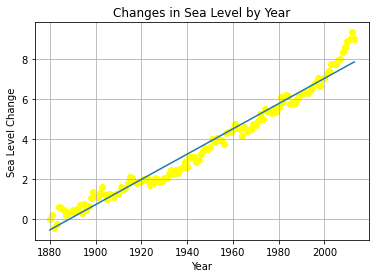

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

def chart_sea_level_stats(year_array, level_array):
  x = year_array
  y = level_array
  display(x)
  display(y)

  plt.scatter(x,y, color= 'yellow')
  plt.xlabel('Year')
  plt.ylabel('Sea Level Change')
  plt.title('Changes in Sea Level by Year')
  plt.grid()
  #plt.show()

  regression = linregress(x,y)
  slope = regression.slope
  intercept = regression.intercept
  plt.plot(x, slope*x + intercept)

  plt.show()
  
  return

#===============================================================================
# Start Here
#===============================================================================
# read csv file into a dataframe
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'
df = pd.read_csv(url)

# Change the column names
df.columns =['Year', 'CSIRO_Adj_Sea_Level', 'Lower_Err_Bound', 'Upper_Err_Bound', 'NOAA_Adj_Sea_Level']

#============================================================================
# Create 2 numpy arrays from input df - one of Years and other of Sea Levels
#============================================================================
year_array, level_array = convert_to_numpy_array(df)

chart_sea_level_stats(year_array, level_array)


### Then
---
1.  Calculate some statistics on the level array, eg:
*  mean
*  standard deviation
*  total 

2.  Use the fact that the arrays are aligned (e.g. the first number in the level array is linked to the first year in the year array and display:

*  the year with the biggest rise in level
*  the year with the lowest rise in level

*(**Hint**:  to do this you can use a new numpy function np.where() )*
 ```
np.where(array == value_to_find)
```
*There is some reference material [here](https://thispointer.com/find-the-index-of-a-value-in-numpy-array/)*

**Note**: ```np.where(...)``` will return a tuple containing all indexes where that value was found.  You can print all, or you can print the first value (it is likely that there will only be one in this case) using [0][0].  *With the correct code you should get an answer of 2012*


3.  Calculate the Pearson product-moment correlation coefficient between year and the rise in sea level.  (*Expected output:  0.98 when rounded to 2 decimal places*)

In [ ]:
display(df.describe())

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: 

## What caused you the most difficulty?

Your answer: 